<a href="https://colab.research.google.com/github/FabioFonsec/Detec-o-da-Doen-a-de-Alzheimer-com-Redes-Neurais-Convolucionais/blob/main/tcc_deteccao_alzheimer_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

uploaded = files.upload()



Saving kaggle.json to kaggle.json


In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!pip install kaggle
!kaggle datasets download -d jayaprakashpondy/alzheimer-dataset
import zipfile
import io

# Substitua 'nome-do-arquivo.zip' pelo nome do seu arquivo ZIP
nome_do_arquivo_zip = 'alzheimer-dataset.zip'

# Extrair o conteúdo
with zipfile.ZipFile(nome_do_arquivo_zip, 'r') as zip_ref:
    zip_ref.extractall()

 47% 16.0M/33.9M [00:00<00:00, 75.1MB/s]
100% 33.9M/33.9M [00:00<00:00, 125MB/s] 


In [ ]:
#!pip uninstall tensorflow

In [ ]:
#!pip install tensorflow==2.8.0

In [ ]:
pip install --upgrade tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 1.3 MB/s eta 0:00:00
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.15.0
    Uninstalling tensorflow-2.15.0:
      Successfully uninstalled tensorflow-2.15.0


In [ ]:
!pip install pydot
!sudo apt-get install graphviz  # (para sistemas baseados em Debian/Ubuntu)


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.


(176, 208, 3)


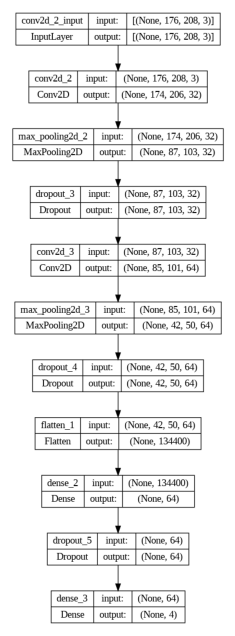

In [ ]:
import tensorflow as tf
from keras import layers, models
from sklearn.utils import shuffle
from keras.preprocessing import image
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from tensorflow.keras.utils import plot_model


# Definir as dimensões desejadas para suas imagens
altura, largura = 176, 208
caminho_levemente_demente = 'dataset/MildDemented'
caminho_moderado_demente = 'dataset/ModerateDemented'
caminho_nao_dementes = 'dataset/NonDemented'
caminho_muito_demente = 'dataset/VeryMildDemented'

# Função para carregar imagens de um diretório
def carregar_imagens(caminho, rotulo):
    imagens = []
    rotulos = []
    for arquivo in os.listdir(caminho):
        caminho_arquivo = os.path.join(caminho, arquivo)
        img = image.load_img(caminho_arquivo, target_size=(altura, largura))
        img_array = image.img_to_array(img)
        imagens.append(img_array)
        rotulos.append(rotulo)
    return np.array(imagens), np.array(rotulos)

# Carregar imagens de cada classe
dados_levemente_demente, rotulos_levemente_demente = carregar_imagens(caminho_levemente_demente,0)
dados_moderado_demente, rotulos_moderado_demente = carregar_imagens(caminho_moderado_demente, 1 )
dados_nao_dementes, rotulos_nao_dementes = carregar_imagens(caminho_nao_dementes, 2 )
dados_muito_demente, rotulos_muito_demente = carregar_imagens(caminho_muito_demente, 3)

# Concatenar dados de treinamento
dados_treino = np.concatenate((dados_levemente_demente, dados_moderado_demente, dados_nao_dementes, dados_muito_demente), axis=0)
rotulos_treino = np.concatenate((rotulos_levemente_demente, rotulos_moderado_demente, rotulos_nao_dementes, rotulos_muito_demente), axis=0)

# Embaralhar dados de treinamento
dados_treino, rotulos_treino = shuffle(dados_treino, rotulos_treino, random_state=42)

# Separar 20% dos dados para teste
frac_teste = 0.2
tamanho_teste = int(frac_teste * len(dados_treino))

dados_teste = dados_treino[:tamanho_teste]
rotulos_teste = rotulos_treino[:tamanho_teste]

# Dados de treinamento restantes
dados_treino = dados_treino[tamanho_teste:]
rotulos_treino = rotulos_treino[tamanho_teste:]
print(dados_treino[0].shape)

# Normalização dos valores dos pixels para o intervalo [0, 1]
dados_treino = dados_treino / 255.0
dados_teste = dados_teste / 255.0

# Construir modelo de rede neural
modelo = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(altura, largura, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),  # Adicionar Dropout com uma taxa de 20%
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),  # Adicionar Dropout com uma taxa de 20%
    layers.Flatten(),
    layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    layers.Dropout(0.3),  # Adicionar Dropout com uma taxa de 30%
    layers.Dense(4, activation='softmax')
])

# Compilar o modelo
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])



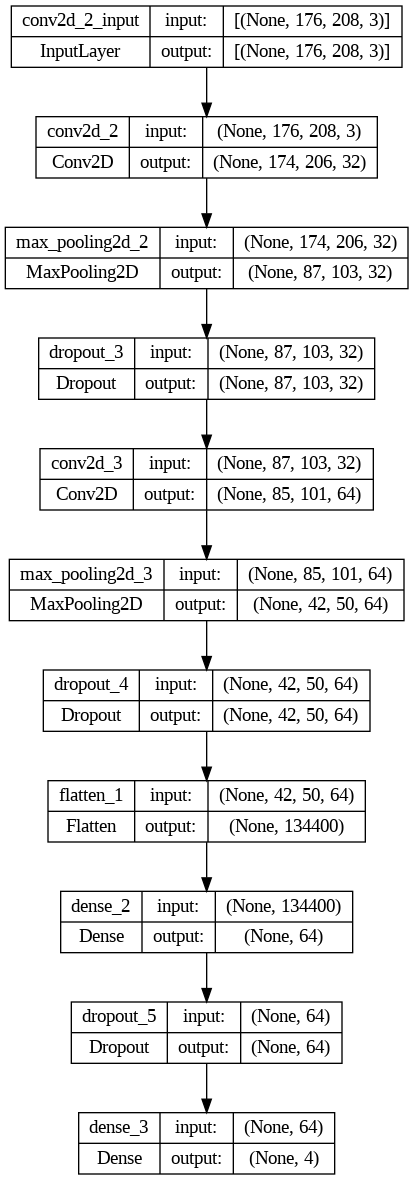

In [ ]:

# Plotar a arquitetura do modelo
plot_model(modelo, to_file='modelo.png', show_shapes=True, show_layer_names=True)



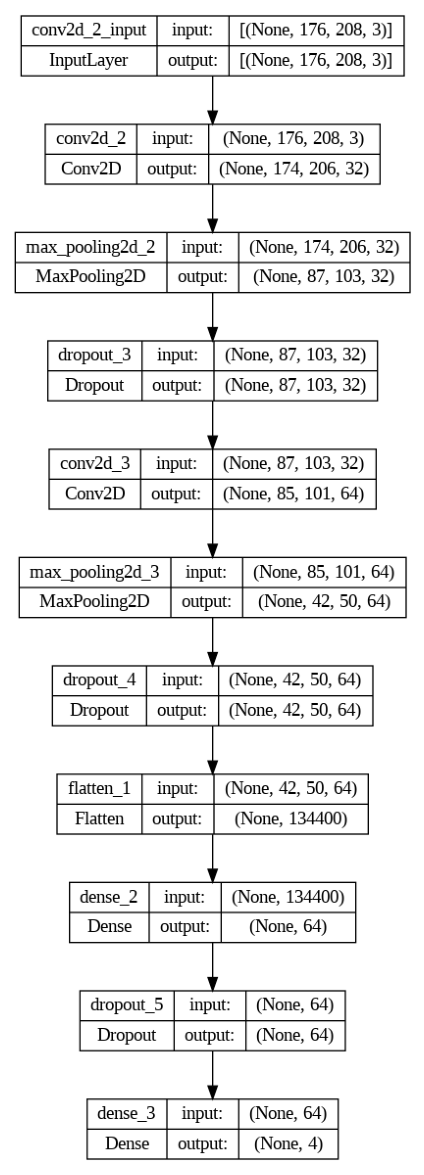

In [ ]:
import matplotlib.image as mpimg
from tensorflow.keras.utils import plot_model

# Plotar a arquitetura do modelo e salvar como imagem
plot_model(modelo, to_file='modelo.png', show_shapes=True, show_layer_names=True, rankdir='TB')

# Carregar a imagem gerada
img = mpimg.imread('modelo.png')

# Criar uma figura
fig, ax = plt.subplots(figsize=(10, 15))
ax.imshow(img)
ax.axis('off')  # Desabilitar os eixos

# Exibir a imagem com estilizações
plt.show()

In [ ]:
# Treinar o modelo por 30 épocas com os dados de treinamento restantes
historico = modelo.fit(dados_treino, rotulos_treino, epochs=10, batch_size=32, validation_split=0.2)



Epoch 1/10
128/128 [==============================] - 285s 2s/step - loss: 1.5783 - accuracy: 0.4849 - val_loss: 1.1633 - val_accuracy: 0.5400
Epoch 2/10
128/128 [==============================] - 286s 2s/step - loss: 1.0583 - accuracy: 0.5378 - val_loss: 0.9991 - val_accuracy: 0.5879
Epoch 3/10
128/128 [==============================] - 288s 2s/step - loss: 0.9870 - accuracy: 0.5686 - val_loss: 1.0534 - val_accuracy: 0.6045
Epoch 4/10
128/128 [==============================] - 287s 2s/step - loss: 0.9571 - accuracy: 0.6099 - val_loss: 0.8835 - val_accuracy: 0.6338
Epoch 5/10
128/128 [==============================] - 287s 2s/step - loss: 0.9078 - accuracy: 0.6348 - val_loss: 0.8833 - val_accuracy: 0.6475
Epoch 6/10
128/128 [==============================] - 287s 2s/step - loss: 0.8610 - accuracy: 0.6819 - val_loss: 0.8258 - val_accuracy: 0.7119
Epoch 7/10
128/128 [==============================] - 285s 2s/step - loss: 0.8279 - accuracy: 0.7100 - val_loss: 0.8377 - val_accuracy: 0.7471

In [ ]:

# Salvar modelo treinado
modelo.save('modelo_treinado.keras')

# Baixar o modelo para o seu computador local
from google.colab import files
files.download('modelo_treinado.keras')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

40/40 [==============================] - 36s 909ms/step - loss: 0.7272 - accuracy: 0.7922
Acurácia nos dados de teste: 0.792187511920929
40/40 [==============================] - 23s 562ms/step


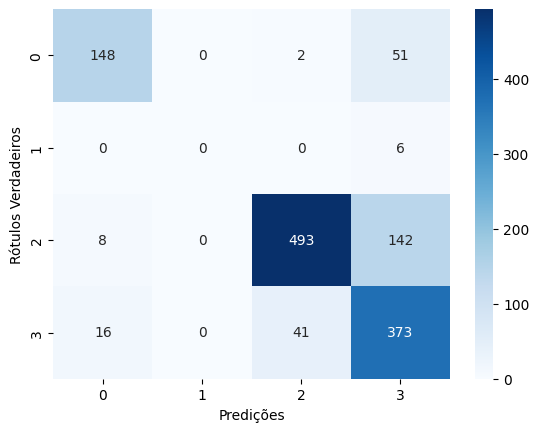

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.86      0.74      0.79       201
           1       0.00      0.00      0.00         6
           2       0.92      0.77      0.84       643
           3       0.65      0.87      0.74       430

    accuracy                           0.79      1280
   macro avg       0.61      0.59      0.59      1280
weighted avg       0.82      0.79      0.79      1280



TypeError: ignored

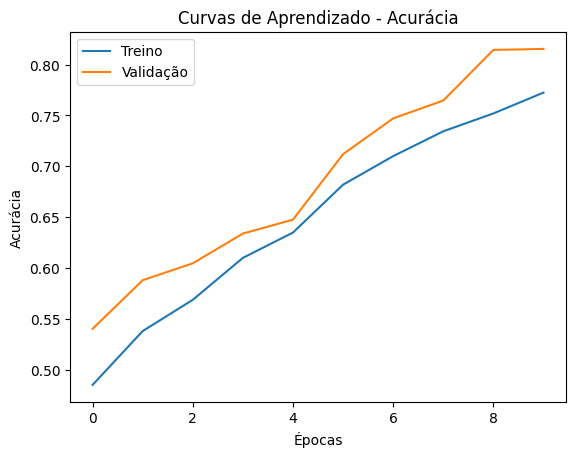

In [ ]:

# Avaliar o modelo nos dados de teste
resultado = modelo.evaluate(dados_teste, rotulos_teste)
print(f'Acurácia nos dados de teste: {resultado[1]}')

# Fazer predições no conjunto de teste
#predicoes = modelo.predict_classes(dados_teste)

predicoes = np.argmax(modelo.predict(dados_teste), axis=-1)


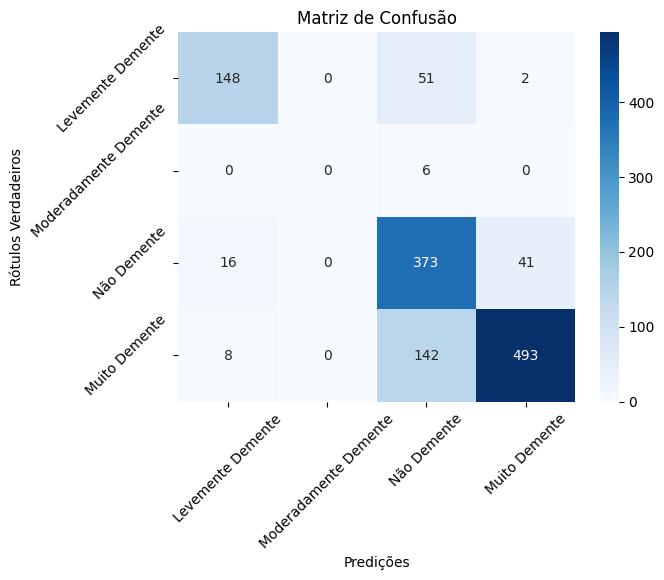

                       precision    recall  f1-score   support

    Levemente Demente       0.86      0.74      0.79       201
Moderadamente Demente       1.00      0.00      0.00         6
          Não Demente       0.92      0.77      0.84       643
        Muito Demente       0.65      0.87      0.74       430

             accuracy                           0.79      1280
            macro avg       0.86      0.59      0.59      1280
         weighted avg       0.82      0.79      0.79      1280



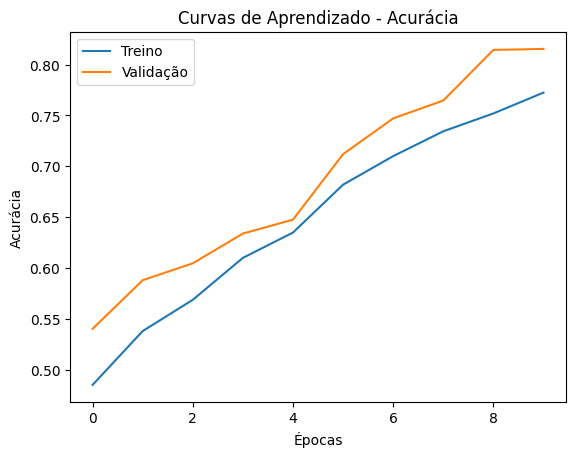

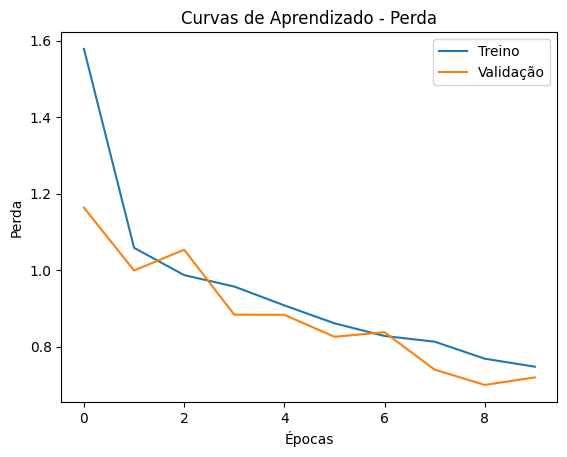

In [ ]:

# Mapeamento de rótulos numéricos para rótulos de texto
mapeamento_rotulos = {
    0: 'Levemente Demente',
    1: 'Moderadamente Demente',
    2: 'Não Demente',
    3: 'Muito Demente'
}

# Aplicar mapeamento aos rótulos
rotulos_texto = np.vectorize(mapeamento_rotulos.get)(rotulos_teste)
predicoes_texto = np.vectorize(mapeamento_rotulos.get)(predicoes)

# Exibir matriz de confusão com rótulos de texto usando seaborn
matriz_confusao = confusion_matrix(rotulos_texto, predicoes_texto)
sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Blues')

# Adicionar uma legenda aos rótulos no eixo x
plt.xticks(np.arange(len(mapeamento_rotulos)) + 0.5, labels=[mapeamento_rotulos[i] for i in range(len(mapeamento_rotulos))], rotation=45)

# Adicionar uma legenda aos rótulos no eixo y
plt.yticks(np.arange(len(mapeamento_rotulos)) + 0.5, labels=[mapeamento_rotulos[i] for i in range(len(mapeamento_rotulos))], rotation=45)

plt.xlabel('Predições')
plt.ylabel('Rótulos Verdadeiros')
plt.title('Matriz de Confusão')

plt.show()



# Mapeamento de rótulos numéricos para rótulos de texto
mapeamento_rotulos = {
    0: 'Levemente Demente',
    1: 'Moderadamente Demente',
    2: 'Não Demente',
    3: 'Muito Demente'
}

#print(mapeamento_rotulos)

# Exibir relatório de classificação com rótulos de texto
relatorio_classificacao = classification_report(rotulos_teste, predicoes, zero_division=1,target_names=list(mapeamento_rotulos.values()))

print(relatorio_classificacao)

# Exibir curvas de aprendizado
plt.plot(historico.history['accuracy'], label='Treino')
plt.plot(historico.history['val_accuracy'], label='Validação')
plt.title('Curvas de Aprendizado - Acurácia')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend()




plt.show()

plt.plot(historico.history['loss'], label='Treino')
plt.plot(historico.history['val_loss'], label='Validação')
plt.title('Curvas de Aprendizado - Perda')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend()
plt.show()

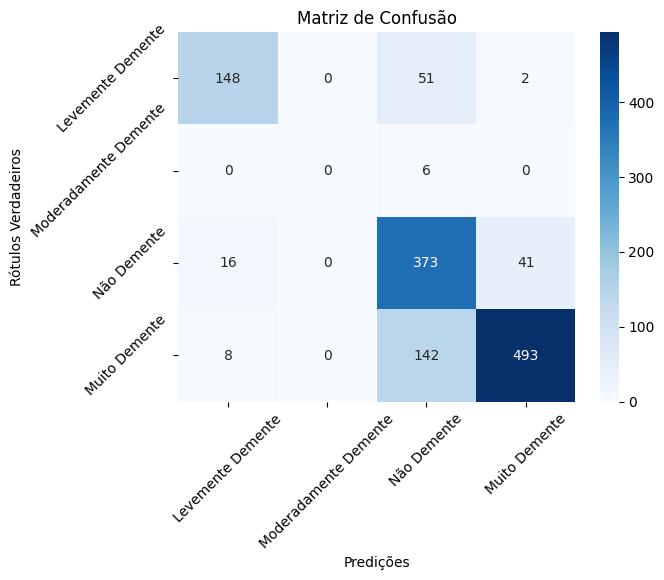

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Mapeamento de rótulos numéricos para rótulos de texto
mapeamento_rotulos = {
    0: 'Levemente Demente',
    1: 'Moderadamente Demente',
    2: 'Não Demente',
    3: 'Muito Demente'
}

# Aplicar mapeamento aos rótulos
rotulos_texto = np.vectorize(mapeamento_rotulos.get)(rotulos_teste)
predicoes_texto = np.vectorize(mapeamento_rotulos.get)(predicoes)

# Exibir matriz de confusão com rótulos de texto usando seaborn
matriz_confusao = confusion_matrix(rotulos_texto, predicoes_texto)
sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Blues')

# Adicionar uma legenda aos rótulos no eixo x
plt.xticks(np.arange(len(mapeamento_rotulos)) + 0.5, labels=[mapeamento_rotulos[i] for i in range(len(mapeamento_rotulos))], rotation=45)

# Adicionar uma legenda aos rótulos no eixo y
plt.yticks(np.arange(len(mapeamento_rotulos)) + 0.5, labels=[mapeamento_rotulos[i] for i in range(len(mapeamento_rotulos))], rotation=45)

plt.xlabel('Predições')
plt.ylabel('Rótulos Verdadeiros')
plt.title('Matriz de Confusão')

plt.show()
